Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([6])    class name:  frog
the shape of the image is:  torch.Size([3, 32, 32])


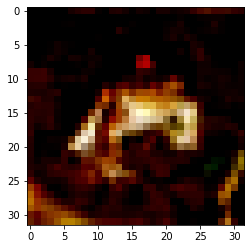

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([9])    class name:  truck
the shape of the image is:  torch.Size([3, 32, 32])


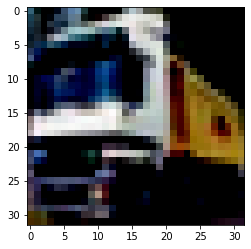

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([9])    class name:  truck
the shape of the image is:  torch.Size([3, 32, 32])


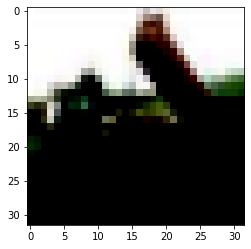

In [5]:
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

categories = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=True,
                                          download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=1)

cnt = 0
for image, label in train_loader:
    if cnt>=3:
        break
    print(label, '   class name: ', categories[label.item()])
    print('the shape of the image is: ', image[0].shape)
    
    img = image[0] # plt.imshow()只能接受3-D Tensor，所以也要用image[0]消去batch那一维
    img = img.numpy() # FloatTensor转为ndarray
    img = np.transpose(img, (1,2,0)) # 把channel那一维放到最后
    plt.imshow(img)
    plt.show()
    cnt += 1
    

In [6]:
# Learn the effect of conv, pool and fc layers
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=True,
                                          download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=10)

# convolution layer parameters:
# input_channel = 3, output_channel = 6, stride = 5
test_convolution_layer = nn.Conv2d(3, 6, 5) 

# max-pooling layer parameters:
# width = 2, height = 2
test_pooling_layer = nn.MaxPool2d(2,2) 

# fully-connected layer parameters:
# input_dim = 6*14*14, output = 10 classes
test_fully_connected_layer = nn.Linear(6*14*14, 10)

cnt = 0
for image, label in train_loader:
    
    # test the effect of convolutional layer
    print('the shape of the input of convolution layer is: ', image.shape)
    convolution_output = test_convolution_layer(image)
    print('the shape of the output of the convolution layer is: ', convolution_output.shape)
    # out_width = (32-5)/1+1 = 28
    
    print('\n\n')
    # test the effect of pooling layer
    print('the shape of the input of the pooling layer is: ', convolution_output.shape)
    pooling_layer_output = test_pooling_layer(convolution_output)
    print('the shape of the output of the convolution layer is: ', pooling_layer_output.shape)
    # out_width = 28/2 = 14
    
    # reshape each image into a vector
    fully_connected_layer_input = pooling_layer_output.view(-1, 6*14*14)
    print('the shape of reshape image is:', fully_connected_layer_input.shape)
    
    print('\n\n')
    # test the effect of fully-connected layer
    print('the shape of the input of the fully-connected layer is: ', fully_connected_layer_input.shape)
    fully_connected_layer_output = test_fully_connected_layer(fully_connected_layer_input)
    print('the shape of the output of the fully-connected layer is: ', fully_connected_layer_output.shape)
    
    break
    

Files already downloaded and verified
the shape of the input of convolution layer is:  torch.Size([10, 3, 32, 32])
the shape of the output of the convolution layer is:  torch.Size([10, 6, 28, 28])



the shape of the input of the pooling layer is:  torch.Size([10, 6, 28, 28])
the shape of the output of the convolution layer is:  torch.Size([10, 6, 14, 14])
the shape of reshape image is: torch.Size([10, 1176])



the shape of the input of the fully-connected layer is:  torch.Size([10, 1176])
the shape of the output of the fully-connected layer is:  torch.Size([10, 10])


C:\Users\Administrator\Desktop\environment\environment\anaconda3\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [10]:
# Training stage
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# define the model structure
class ModelStructure(nn.Module):
    def __init__(self):
        super(ModelStructure, self).__init__()
        # define the convolution layer, pooling layer, activation function and fully-connected layers here
        self.module1 = nn.Conv2d(3,6,5)
        self.module2 = nn.MaxPool2d(2,2) 
        self.module3 = nn.Linear(6*14*14, 10)
        
        #define activation function here 
        self.activation_function = nn.ReLU()
        
        # TODO:
        # you have to construct the modules of LeNet strudture here
    
    def forward(self, image):
        # define the data flow of the model 
        out1 = self.module1(image)
        out2 = self.module2(out1)
        out3 = out2.view(-1, 6*14*14)
        out4 = self.module3(out3)
        return out4
        
        # TODO:
        # you have to define the data flow of the LeNet strudture here
    

# define the training dataset of this experiments
train_data = torchvision.datasets.CIFAR10(root='数据集/data/CIFAR10', train=True,
                                          download=True, transform=transform)
# TODO:
# define the test set here by yourself

train_loader = torch.utils.data.DataLoader(train_data, batch_size=10, shuffle=True)

# TODO:
# convert your test set into a dataloader

model = ModelStructure()
optimzer = optim.SGD(model.parameters(), lr=0.01)

# TODO:
# try different optimization methods, different learning rates

loss_function = nn.CrossEntropyLoss()
# TODO:
# try different loss functions

for image, label in train_loader:
    outputs = model(image)
    loss = loss_function(outputs, label)
    print(loss.item())
    # TODO:
    # analyse the loss change during training with more epochs
    optimzer.zero_grad()
    loss.backward()
    optimzer.step()

# TODO :
# train your model with more epochs
# add evaluation method
# pred_correctness = output.argmax(dim=1).eq(labels).sum().item()
# conduct evaluation 

print('Training Done!!!!')



Files already downloaded and verified
2.3465118408203125
2.3638663291931152
2.2718558311462402
2.244544744491577
2.36277437210083
2.2410175800323486
2.2303555011749268
2.26220703125
2.2064261436462402
2.2556772232055664
2.1289143562316895
2.2193245887756348
2.314484119415283
2.3093435764312744
2.0918304920196533
2.1116583347320557
2.157064914703369
2.0979256629943848
2.327094554901123
2.2715675830841064
2.2410717010498047
2.137613534927368
2.1394336223602295
2.2024919986724854
2.2252302169799805
2.1283507347106934
2.122830867767334
2.2519149780273438
1.9460909366607666
2.317157745361328
2.2264420986175537
2.01448392868042
2.145463466644287
2.1774935722351074
2.164094924926758
2.129652500152588
2.2667815685272217
2.2781524658203125
1.911389708518982
2.2231128215789795
2.2060546875
2.062748432159424
2.003588914871216
1.9563783407211304
1.9062511920928955
2.0566184520721436
1.8042329549789429
2.125007390975952
2.059704303741455
2.429060459136963
2.4108664989471436
1.9992700815200806
1.844

1.7984870672225952
1.7911851406097412
1.925925612449646
1.528565526008606
1.8303868770599365
2.0222091674804688
1.711731195449829
1.6480233669281006
2.0572876930236816
1.701181411743164
1.7640968561172485
1.437943696975708
2.0700008869171143
1.7911155223846436
1.496808409690857
1.7850583791732788
2.5891311168670654
1.7926476001739502
2.074897050857544
1.6963331699371338
2.057464838027954
1.7736183404922485
1.641269326210022
1.4071073532104492
1.9410394430160522
1.9396690130233765
1.6831079721450806
1.5109339952468872
1.2642877101898193
1.792009711265564
2.547194004058838
1.5345284938812256
1.867818832397461
1.6806294918060303
1.7671409845352173
2.008775234222412
1.8160368204116821
1.7389507293701172
1.7968664169311523
2.013504981994629
1.7040859460830688
1.9299900531768799
1.6840614080429077
1.7903482913970947
1.803497076034546
1.6655299663543701
1.682212233543396
2.12280535697937
2.080286979675293
1.7026336193084717
1.9309927225112915
2.232056140899658
1.9734948873519897
1.89059770107

1.7903556823730469
1.9720312356948853
1.5357458591461182
1.8700536489486694
1.671377420425415
1.4687457084655762
1.5168657302856445
1.5372121334075928
1.335663914680481
2.2582273483276367
1.4547944068908691
1.539738416671753
1.4531253576278687
1.5796548128128052
2.098559856414795
1.52118980884552
1.7561709880828857
1.9969661235809326
1.9926621913909912
1.643731713294983
2.165285587310791
1.7613312005996704
1.7418378591537476
2.2360851764678955
1.654355764389038
1.4526233673095703
1.1132333278656006
1.6585346460342407
2.180983781814575
1.499046802520752
1.7916406393051147
1.8715931177139282
2.056952476501465
1.5064786672592163
2.321528196334839
1.315288782119751
1.5865705013275146
1.185239315032959
1.3365764617919922
1.901710867881775
1.2578600645065308
1.530379295349121
1.890066146850586
1.5436670780181885
1.8731495141983032
1.451427936553955
1.5413172245025635
1.448516845703125
1.5210185050964355
1.7490898370742798
2.1062748432159424
2.0023343563079834
1.3436570167541504
1.45879554748

1.058397889137268
1.8454997539520264
2.352107286453247
1.6755821704864502
1.319988489151001
1.6050310134887695
1.721655249595642
1.7378952503204346
1.516685128211975
2.260831117630005
2.234614849090576
1.6758981943130493
1.706884741783142
1.9868625402450562
1.4968727827072144
1.7848304510116577
1.6298154592514038
1.5261383056640625
1.2657653093338013
1.169640064239502
1.5824286937713623
1.5649096965789795
1.2951613664627075
1.6277631521224976
1.8918403387069702
2.0125346183776855
1.6176207065582275
1.9815847873687744
1.9881893396377563
2.580186367034912
1.190389633178711
2.323302745819092
1.1246134042739868
1.6498445272445679
1.2057359218597412
1.7337753772735596
1.1021236181259155
2.1793065071105957
1.7124536037445068
1.9399341344833374
2.459242582321167
2.7026755809783936
1.7752841711044312
1.6978029012680054
2.2309048175811768
1.5779244899749756
1.7371305227279663
1.9011402130126953
2.318387985229492
2.0385375022888184
1.8651142120361328
1.646526575088501
1.8439805507659912
1.596783

2.0474343299865723
1.6058851480484009
1.7504732608795166
1.5412685871124268
1.1416001319885254
2.2272117137908936
1.3636205196380615
1.6550304889678955
1.7444121837615967
1.8433444499969482
1.4772601127624512
1.6437041759490967
1.9039884805679321
1.5100903511047363
2.093116044998169
1.9183984994888306
1.7160660028457642
1.2858998775482178
1.545235514640808
2.05491304397583
1.5533459186553955
1.282958745956421
1.51112699508667
1.5664806365966797
1.5323394536972046
1.6568450927734375
1.287150502204895
1.431947946548462
1.0490459203720093
1.465196967124939
1.8412342071533203
2.760319948196411
1.642711877822876
2.224935531616211
1.544863224029541
1.746016263961792
1.2363471984863281
1.9662506580352783
1.7278282642364502
1.0855047702789307
1.7962865829467773
1.995385766029358
1.1834425926208496
1.5908515453338623
1.4683008193969727
1.759767770767212
1.2791798114776611
1.2101577520370483
1.6395947933197021
2.075521945953369
1.2189631462097168
1.7755663394927979
1.7627023458480835
1.763113021

1.9151074886322021
1.762670874595642
1.293210744857788
1.2505156993865967
1.4368667602539062
1.4124947786331177
1.9149713516235352
0.8659499883651733
1.6787093877792358
1.566881537437439
2.529231309890747
1.6828895807266235
1.7824132442474365
2.0588183403015137
2.155886173248291
2.3767056465148926
1.5152244567871094
1.9467651844024658
1.4748235940933228
1.4189708232879639
1.2808372974395752
1.7026646137237549
1.6001014709472656
1.572485327720642
1.7756617069244385
2.07641339302063
1.4438388347625732
1.6055536270141602
1.9242525100708008
1.3390417098999023
1.4866772890090942
1.7071644067764282
1.6833244562149048
1.9984893798828125
0.9432185292243958
1.9381707906723022
1.9583652019500732
1.3913991451263428
1.3193352222442627
1.4193408489227295
1.4211887121200562
1.7691833972930908
1.848658561706543
2.3118996620178223
2.188145160675049
2.12133526802063
1.8220363855361938
1.3981561660766602
1.7338464260101318
1.8272931575775146
2.1695914268493652
1.6282196044921875
1.5430930852890015
1.614

2.4309427738189697
1.7672719955444336
2.0171711444854736
2.0392918586730957
2.9813122749328613
1.3942768573760986
1.521902322769165
1.5289416313171387
1.1595299243927002
1.2410775423049927
1.2495367527008057
2.3447022438049316
1.2419109344482422
1.3607298135757446
1.4765775203704834
1.4652180671691895
1.6544193029403687
1.4260228872299194
1.7852033376693726
1.3782923221588135
1.7321603298187256
1.3704077005386353
1.9844110012054443
1.546404242515564
2.254554271697998
1.7685333490371704
1.8750299215316772
1.4296393394470215
1.4117534160614014
1.3996732234954834
1.4661781787872314
1.8535573482513428
1.0696531534194946
1.6486631631851196
1.3273966312408447
1.9128100872039795
1.5561541318893433
1.407151222229004
2.356853485107422
0.9704036712646484
1.6740381717681885
1.053765058517456
1.426426649093628
1.4990174770355225
1.3339370489120483
1.0497052669525146
1.369769811630249
1.8639633655548096
1.7413864135742188
1.3480256795883179
1.3584685325622559
1.6322237253189087
1.4179668426513672
1

1.1519960165023804
1.6565792560577393
2.4319119453430176
1.4650890827178955
1.952206015586853
1.4975244998931885
1.849069595336914
1.4947869777679443
1.101407766342163
1.0172183513641357
1.717098593711853
1.3987696170806885
1.0652828216552734
1.9672552347183228
1.578775405883789
2.0930960178375244
1.0213110446929932
1.6796352863311768
1.9811275005340576
1.2944297790527344
1.3713890314102173
1.6419153213500977
1.2591121196746826
1.3441587686538696
1.7473382949829102
2.6930618286132812
1.534612774848938
1.3184956312179565
1.5282175540924072
1.4194142818450928
1.4628030061721802
1.3647253513336182
1.7479031085968018
1.6004968881607056
1.5023760795593262
1.6335561275482178
1.09438955783844
1.5472720861434937
1.6847909688949585
1.7788909673690796
1.627886414527893
1.0265438556671143
1.3389885425567627
1.3267115354537964
2.145561456680298
1.5601909160614014
1.7552696466445923
1.4434564113616943
1.688047170639038
1.3969075679779053
1.038602590560913
1.493756890296936
2.134458065032959
1.26501

1.4459545612335205
1.4793146848678589
2.107567310333252
2.098557472229004
1.5983902215957642
2.301501989364624
1.0950357913970947
1.314480185508728
1.3426793813705444
1.7373247146606445
1.797079086303711
1.7707598209381104
1.2183459997177124
1.9804996252059937
1.419148325920105
1.177195429801941
1.8954589366912842
1.3551877737045288
2.0816733837127686
1.2668689489364624
1.2134363651275635
1.850388526916504
1.3575153350830078
2.4338345527648926
1.8651840686798096
1.283119559288025
1.806624174118042
0.9793834686279297
1.2572699785232544
2.2215847969055176
1.7350355386734009
1.5307340621948242
1.2625044584274292
0.9015768766403198
1.735577940940857
1.1703604459762573
2.0293731689453125
0.9800812005996704
1.5882807970046997
2.4036922454833984
1.653588891029358
2.744361162185669
1.7190738916397095
1.8969590663909912
1.8492796421051025
1.1089692115783691
1.6672542095184326
1.502282738685608
1.8892343044281006
1.3034173250198364
1.6307283639907837
1.5083532333374023
2.201249122619629
1.077282

1.6099411249160767
1.2923847436904907
1.1161597967147827
1.6425011157989502
1.047042965888977
1.698491096496582
1.6342499256134033
1.6958500146865845
1.1998515129089355
1.3209311962127686
1.595331072807312
1.2256500720977783
1.6220247745513916
1.7888063192367554
1.3945040702819824
1.8445427417755127
1.181071162223816
1.544801115989685
0.8172264099121094
1.9535725116729736
1.5210950374603271
1.442029356956482
1.4331454038619995
1.1924753189086914
2.366672992706299
1.2395914793014526
1.4599804878234863
1.3823719024658203
1.9939101934432983
0.9162429571151733
0.9733187556266785
1.3877511024475098
2.2002549171447754
1.1112045049667358
1.3346163034439087
1.1211212873458862
1.4930427074432373
1.2258694171905518
1.1386855840682983
1.68514084815979
1.2402292490005493
1.2770905494689941
1.394423484802246
1.3519175052642822
1.3278814554214478
1.3048216104507446
1.3148539066314697
2.0262680053710938
1.304627537727356
1.5289502143859863
1.0185359716415405
1.180638313293457
1.8328577280044556
1.820

1.7214765548706055
1.8691883087158203
1.0502933263778687
1.5828500986099243
1.549561619758606
1.7823225259780884
1.3219845294952393
1.74399733543396
1.5244687795639038
2.1351089477539062
1.5686519145965576
1.4812910556793213
1.783790946006775
1.4092235565185547
1.4445264339447021
1.638045310974121
1.7235609292984009
1.1260043382644653
1.698001503944397
1.348968505859375
1.3225538730621338
1.0624394416809082
1.152212142944336
1.6678783893585205
1.4420830011367798
2.034200668334961
0.9513139724731445
1.245880365371704
1.6445719003677368
1.3776485919952393
1.4037895202636719
2.012519598007202
1.9159634113311768
1.7209428548812866
2.0367519855499268
1.2166365385055542
1.5182592868804932
1.3518065214157104
1.2379812002182007
1.8727951049804688
1.8179337978363037
1.3196982145309448
1.912358283996582
2.0091185569763184
1.7774512767791748
1.4435700178146362
1.1228878498077393
1.4274054765701294
1.4036742448806763
1.3189637660980225
1.674367904663086
1.7131668329238892
1.2606322765350342
1.5443

In [ ]:
# Error analysis:
pred = model(images)
def inference(pred, target):
    # TODO:
    # analysis the error samples
    pass